# Exploring the Financial Transactions dataset using Pandas, Matplotlib and Seaborn

In this notebook, you will be loading a CSV file into a Jupyter Notebook environment and analyzing and exploring your data using Pandas, Matplotlib, and Seaborn to get a better understanding of your features. You will use the information you gain from this process to select the best set of features for your model in AutoML.

For full descriptions and commentary for the operations being covered in this notebook, please see Chapter 5 of the Low-Code AI book.

## Loading Data into a Pandas DataFrame in a Google Colab Notebook

First import the Matplotlib, Numpy, Pandas and Seaborn packages.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline

Now that the packages are imported, the next step is to load the data into a Pandas DataFrame:

In [4]:
url = 'https://storage.googleapis.com/low-code-ai-book/financial_transactions.csv'

transaction_df = pd.read_csv(url)

With the data loaded into the `transaction_df` DataFrame, look at the first five rows using the `head()` method.

In [5]:
transaction_df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

## Exploring the Dataset

Use the `.info()` method on your DataFrame to get a quick understanding of the amount of data you are working with and the data types of the columns. 

In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Use the `describe()` method to see the descriptive statistics for each column.

In [7]:
transaction_df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

Use the `describe()` method on the categorical features to look at their descriptive statistics.

In [8]:
cols = ['type', 'nameOrig', 'nameDest']
transaction_df[cols].describe()


type     nameOrig     nameDest
count    6362620      6362620      6362620
unique         5      6353307      2722362
top     CASH_OUT  C1902386530  C1286084959
freq     2237500            3          113

Create a new column, `isCorrect`, to record if the `isFraud` and `isFlaggedFraud` columns are the same. Use `sum()` method to compute total numnber of correct examples.

In [9]:
transaction_df['isCorrect'] = (transaction_df['isFraud']==transaction_df['isFlaggedFraud'])
transaction_df['isCorrect'].sum()


6354423

Compute the number of times that the `isFlaggedFraud` column correctly predicts fradulent transactions.

In [10]:
(transaction_df['isFraud']*transaction_df['isCorrect']).sum()

16

Plot a bar chart using the `plot.bar()` method to visualize the percentage of fradulent transactions for each transaction type.

<Axes: xlabel='type'>

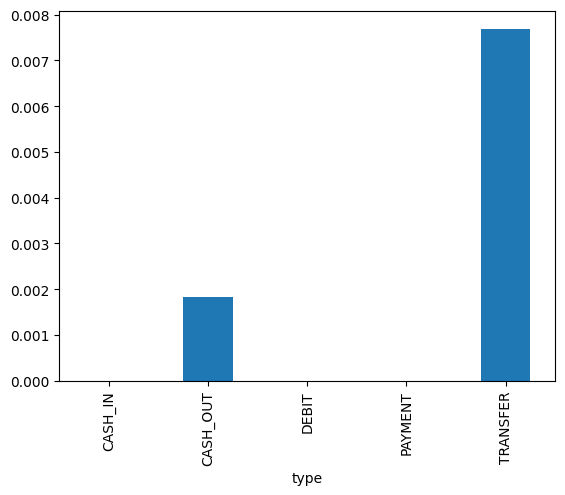

In [11]:
transaction_df.groupby('type')['isFraud'].mean().plot.bar()

Compute the number of times each value appears for the combination of `type` and `isFraud`.

In [12]:
transaction_df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64

Visualize percentages of fradulent transaction by decile of the amount of each transaction.

/tmp/ipykernel_59647/2176374019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_df.groupby('amountBkts')['isFraud'].mean().plot.bar()


<Axes: xlabel='amountBkts'>

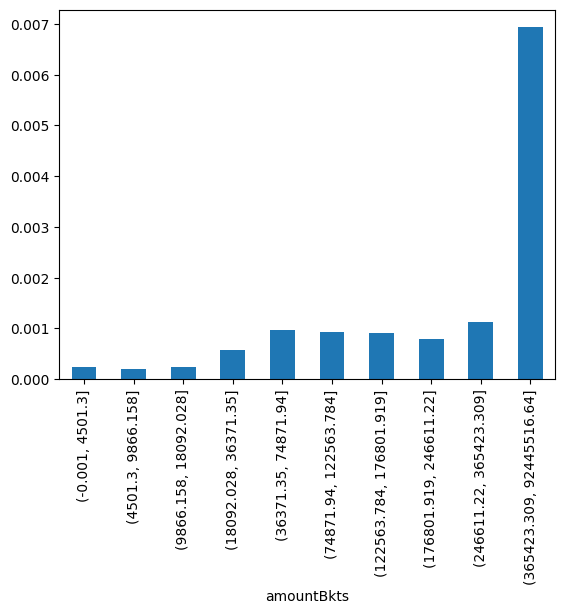

In [13]:
transaction_df['amountBkts'] = pd.qcut(transaction_df['amount'], 10)
transaction_df.groupby('amountBkts')['isFraud'].mean().plot.bar()


Visualize percentages of fradulent transaction by decile of the value of the `oldbalanceOrg` column for each transaction.

/tmp/ipykernel_59647/4245970533.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_df.groupby('oldbalanceOrgBkts')['isFraud'].mean().plot.bar()


<Axes: xlabel='oldbalanceOrgBkts'>

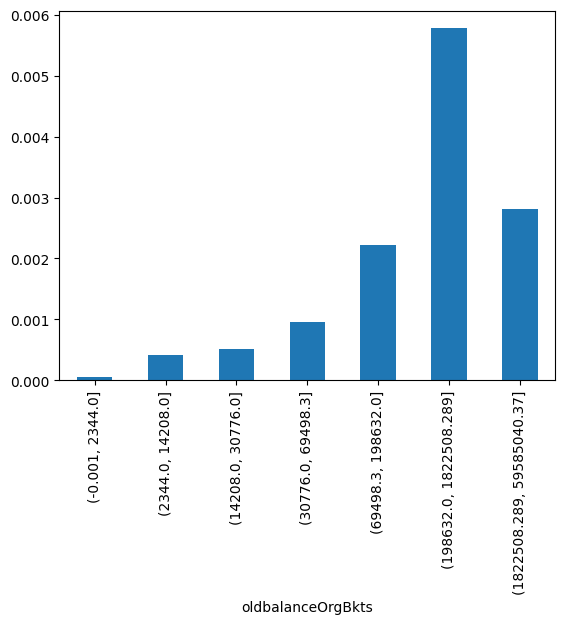

In [14]:
transaction_df['oldbalanceOrgBkts'] = pd.qcut(transaction_df['oldbalanceOrg'], 10,
                        duplicates='drop')
transaction_df.groupby('oldbalanceOrgBkts')['isFraud'].mean().plot.bar()


Visualize percentages of fradulent transaction by decile of the value of the `newbalanceOrig` column for each transaction.

/tmp/ipykernel_59647/1536429408.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_df.groupby('newbalanceOrigBkts')['isFraud'].mean().plot.bar()


<Axes: xlabel='newbalanceOrigBkts'>

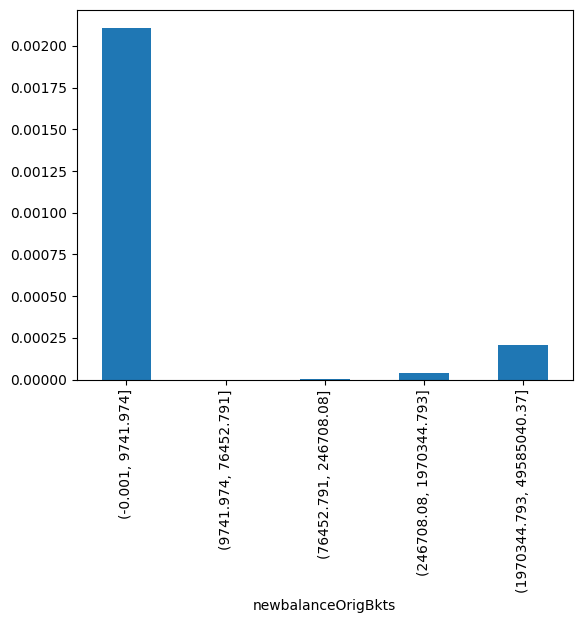

In [15]:
transaction_df['newbalanceOrigBkts'] = pd.qcut(transaction_df['newbalanceOrig'], 10,
                                              duplicates='drop')
transaction_df.groupby('newbalanceOrigBkts')['isFraud'].mean().plot.bar()

Visualize percentages of fradulent transaction by decile of the value of the `newbalanceDest` column for each transaction.

/tmp/ipykernel_59647/2430351240.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_df.groupby('newbalanceDestBkts')['isFraud'].mean().plot.bar()


<Axes: xlabel='newbalanceDestBkts'>

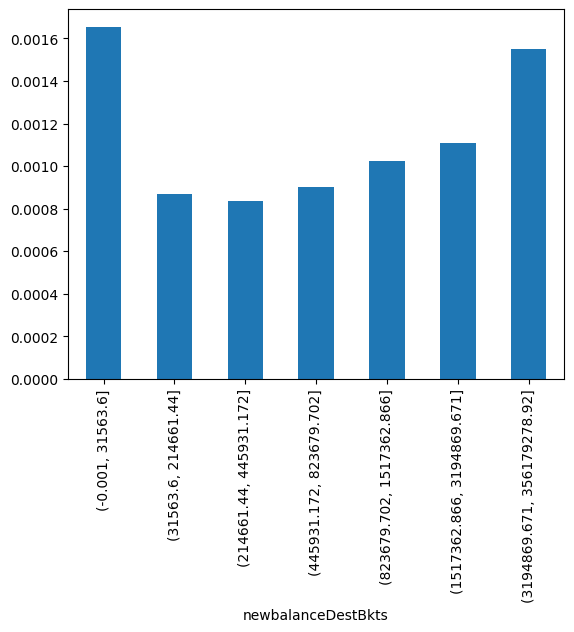

In [16]:
transaction_df['newbalanceDestBkts'] = pd.qcut(transaction_df['newbalanceDest'], 10,
                                              duplicates='drop')
transaction_df.groupby('newbalanceDestBkts')['isFraud'].mean().plot.bar()

Visualize percentages of fradulent transaction by decile of the value of the `oldbalanceDest` column for each transaction.

/tmp/ipykernel_59647/1658467965.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_df.groupby('oldbalanceDestBkts')['isFraud'].mean().plot.bar()


<Axes: xlabel='oldbalanceDestBkts'>

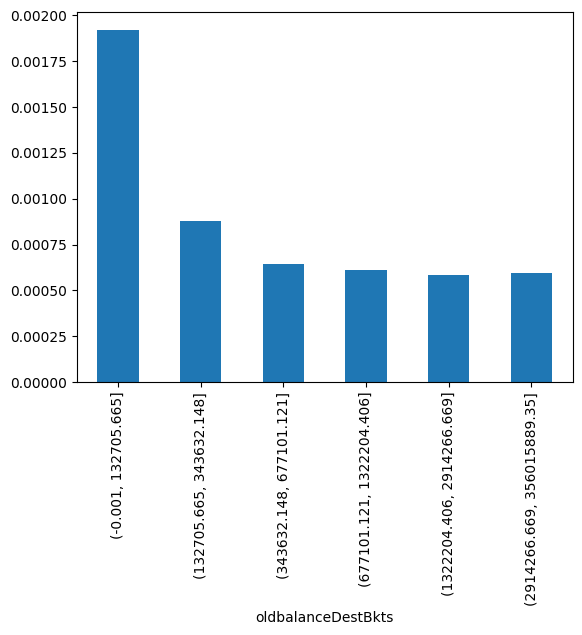

In [17]:
transaction_df['oldbalanceDestBkts'] = pd.qcut(transaction_df['oldbalanceDest'], 10,
                                              duplicates='drop')
transaction_df.groupby('oldbalanceDestBkts')['isFraud'].mean().plot.bar()

You know that only two types of transactions historically have been fraudulent. Create a scatterplot for one of these types, `CASH_OUT`, where you plot the `newbalanceDest` versus
the `oldbalanceDest` and then color the points depending on whether they were
fraudulent or not. Use the following code to create this visualization

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

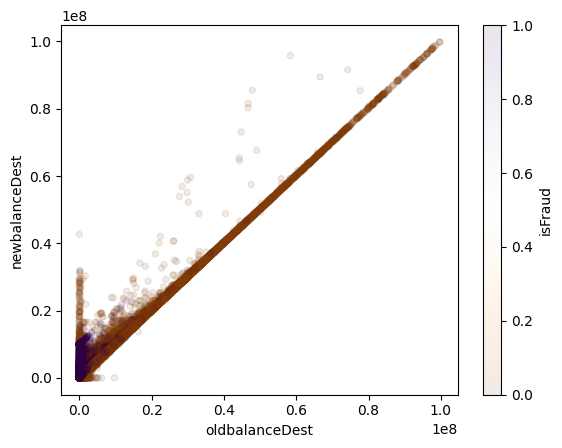

In [18]:
cashout_df = transaction_df.query("type == 'CASH_OUT' & newbalanceDest < 1e8")
cashout_df.plot.scatter(x='oldbalanceDest',
                        y='newbalanceDest',
                        c='isFraud',
                        colormap='PuOr',
                        alpha=0.1)


Store the results of the `transaction_df` dataframe, including the newly created columns, into a CSV file for upload into a Vertex AI dataset for the sake of AutoML training.

**Note**: This CSV file could be used anywhere for further analysis or training an ML model! We have done nothing specific here for the sake of Vertex AI AutoML.

In [22]:
transaction_df.to_csv('transactions.csv', encoding='utf-8',
                      index=False)


Print the first 10 lines of the `transactions.csv` file as a sanity check.

In [20]:
!head transactions.csv

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isCorrect,amountBkts,oldbalanceOrgBkts,newbalanceOrigBkts,newbalanceDestBkts,oldbalanceDestBkts
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True,"(4501.3, 9866.158]","(69498.3, 198632.0]","(76452.791, 246708.08]","(-0.001, 31563.6]","(-0.001, 132705.665]"
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True,"(-0.001, 4501.3]","(14208.0, 30776.0]","(9741.974, 76452.791]","(-0.001, 31563.6]","(-0.001, 132705.665]"
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,False,"(-0.001, 4501.3]","(-0.001, 2344.0]","(-0.001, 9741.974]","(-0.001, 31563.6]","(-0.001, 132705.665]"
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,False,"(-0.001, 4501.3]","(-0.001, 2344.0]","(-0.001, 9741.974]","(-0.001, 31563.6]","(-0.001, 132705.665]"
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,T

Use the `files.download()` method in Google Colab to download the CSV file to your local machine.

In [22]:
from google.colab import files
files.download('transactions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>